# V.1 Exploring the green reds
### a) function that plot scatterplot matrix of red wine data

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

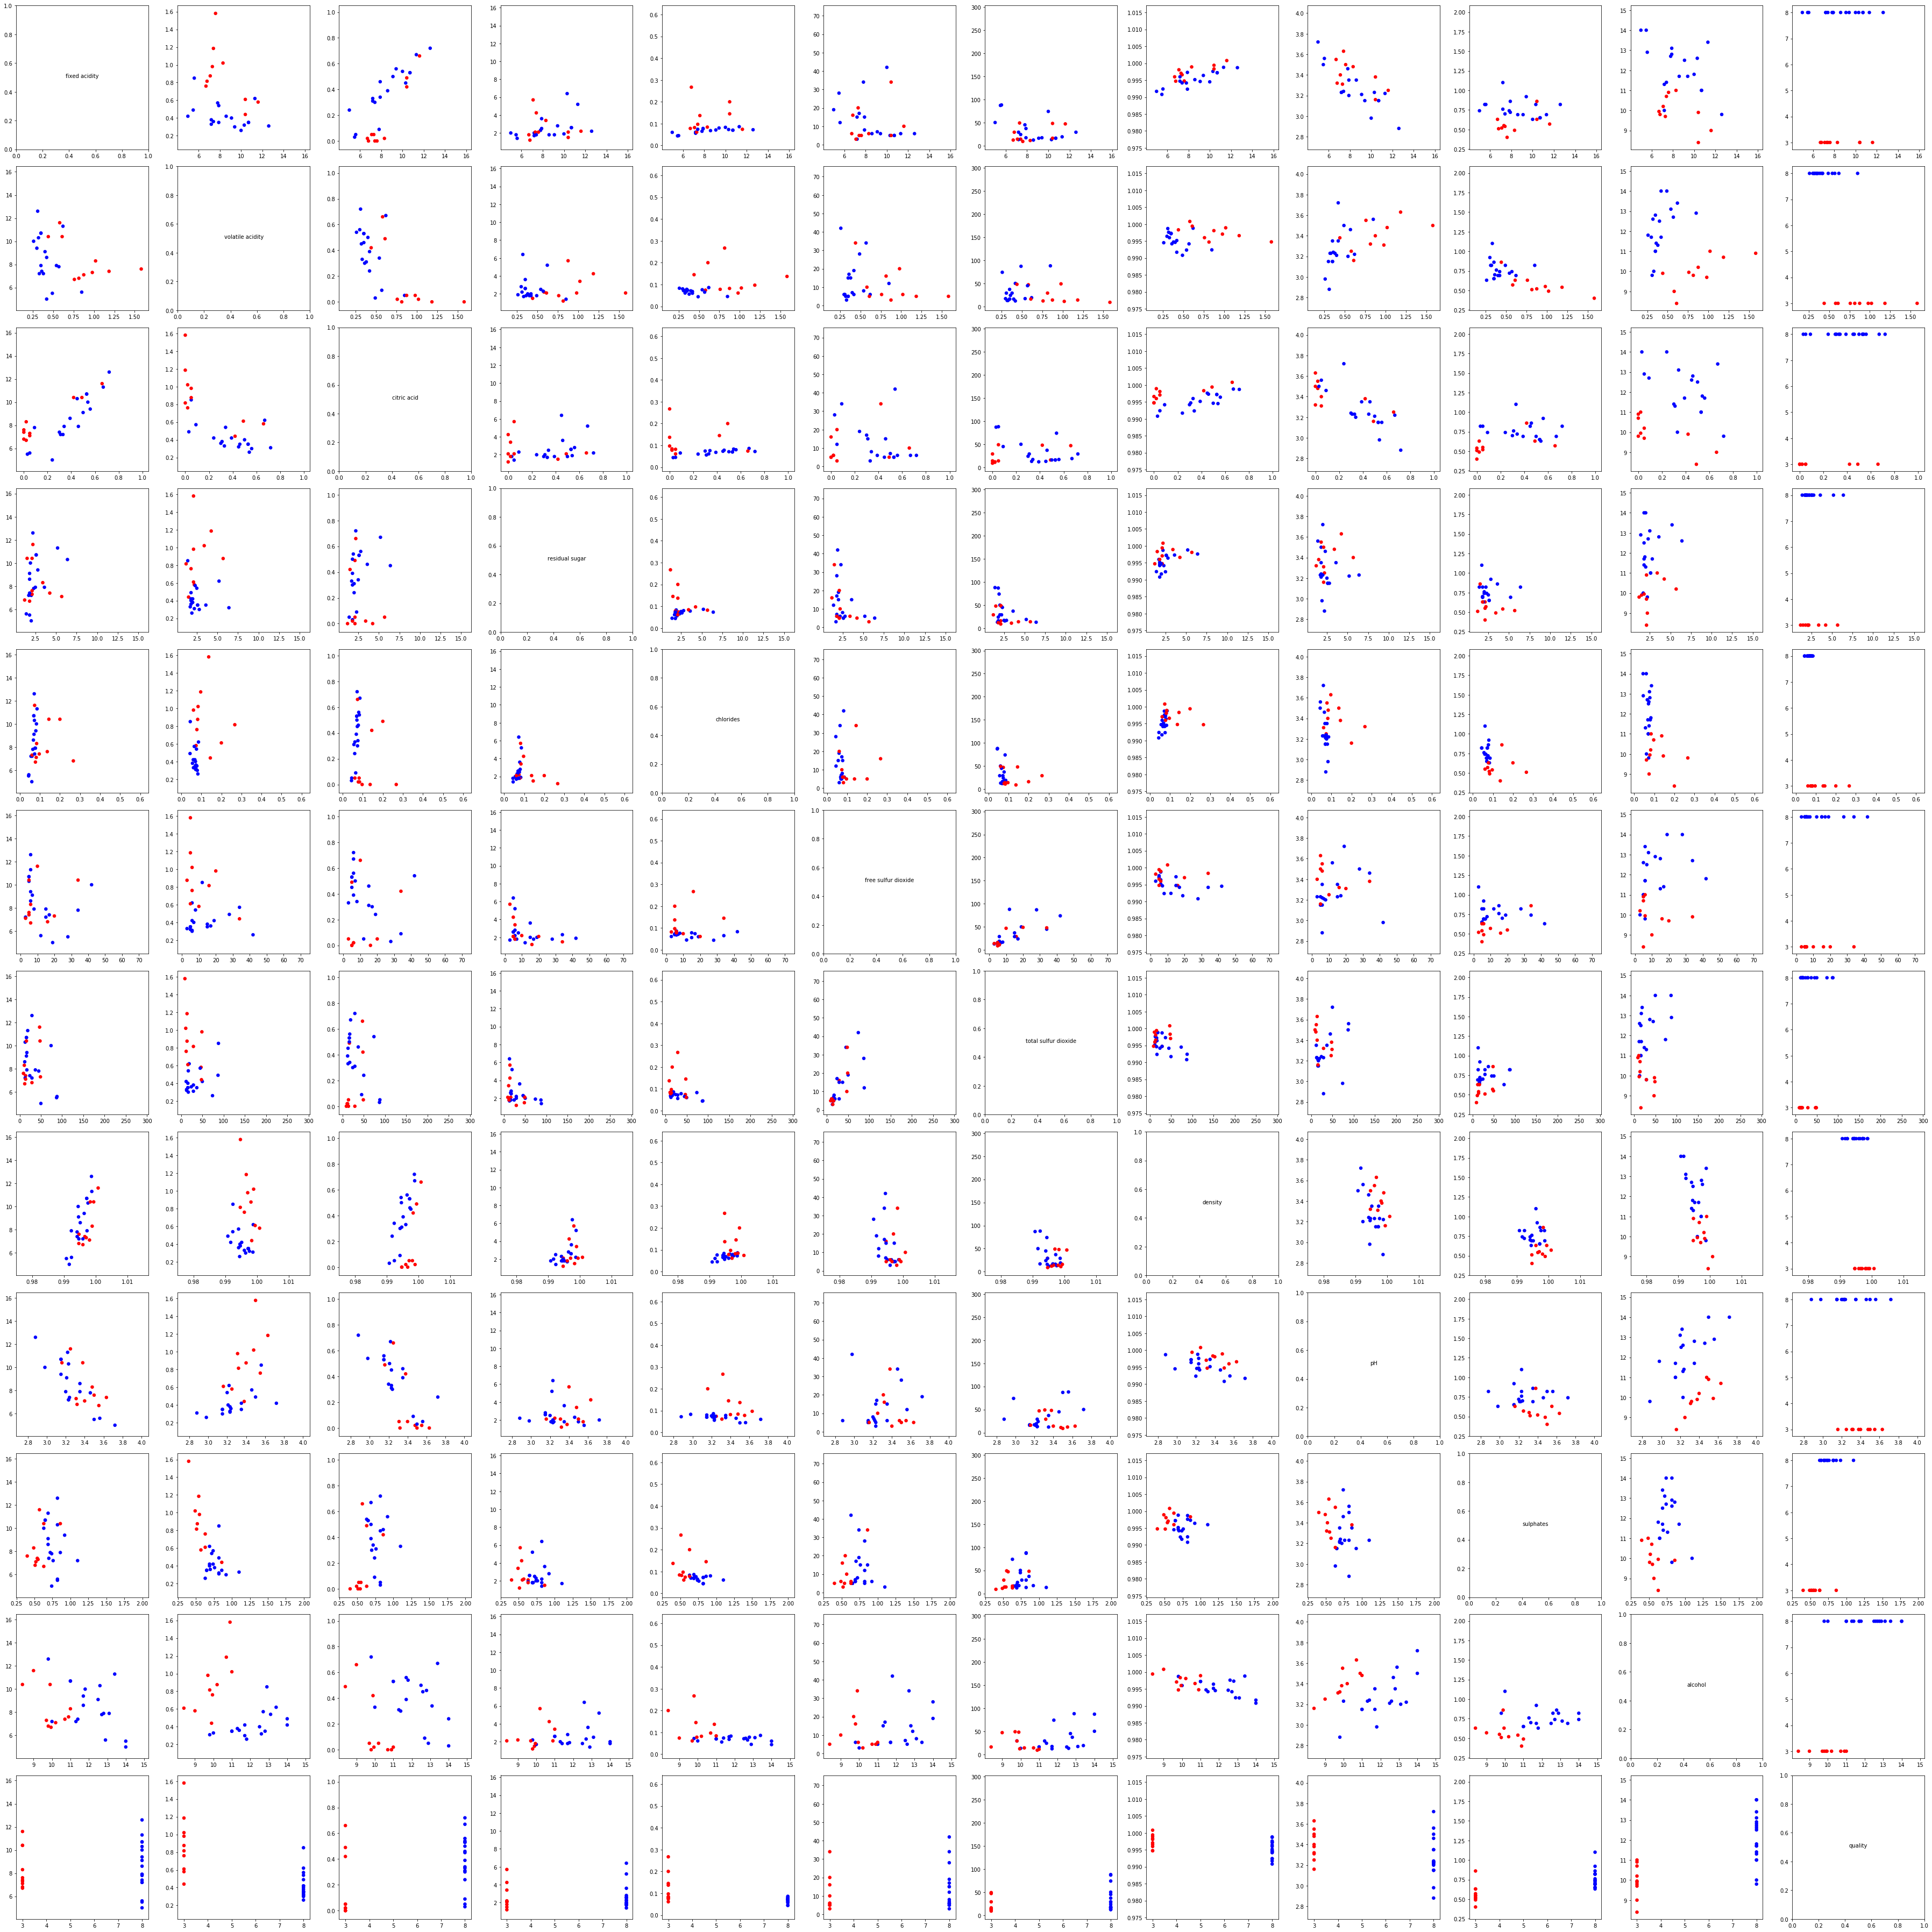

In [2]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot):
    df = pd.read_csv(wine_data, sep=';')
    numvars, numdata = df.shape
    fig, axes = plt.subplots(numdata, numdata, figsize=(50,50))
    for i in range(numdata):
        for j in range(numdata):
            if i == j:
                axes[i, j].text(0.5, 0.5, df.columns[i], ha='center')
            else:
                color = ['blue' if k >= good_threshold else 'red' for k in df['quality']]
                size = [30 if k >= good_threshold else 30 if k <= bad_threshold else 0 for k in df['quality']]
                axes[i,j].scatter(df[df.columns[i]], df[df.columns[j]], c = color, s = size)
    if save_plot==True:
        plt.savefig('./winedata.png')
    plt.tight_layout()
    fig

plot_scatter_matrix('winequality-red.csv', 8, 3, save_plot=False)

### b) the most useful factor for distinguishing high vs. low quality wine and why?
#### pH values and alcohol values seems the best factors to distinguish high and low quality wine because the scatter graph of the factors has distinguishable region of good wine and bad wine.


# V.2 Learning to perceptron
### a) & b) implement a perceptron

In [3]:
class perceptron():
    def __init__(self, thresholds=0.0, eta=0.01, n_iter=0):
        self.thresholds = thresholds
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = []
        result_ = []
        num_epoch = 0
        for i in range(1 + X.shape[1]):
            random.seed(0)
            self.w_.append(random.random())
        self.errors_ = []
        if (self.n_iter != 0):
            for _ in range(self.n_iter):
                errors = 0
                result = 0
                num_epoch += 1
                for xi, target in zip(X, y):
                    update = self.eta * (int(target) - self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += int(update != 0.0)
                    result = (num_epoch, errors, self.w_[1:], self.w_[0])
                self.errors_.append(errors)
                result_.append(result)
                
        else:
            while (1):
                errors = 0
                result = 0
                num_epoch += 1
                for xi, target in zip(X, y):
                    update = self.eta * (int(target) - self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += int(update != 0.0)
                    result = (num_epoch, errors, self.w_[1:], self.w_[0])
                self.errors_.append(errors)
                result_.append(result)
                if (errors == 0):
                    break
                
        return result_
    def net_input(self, X):
        activation = self.w_[0]
        for i in range(len(X)):
            activation += self.w_[i + 1] * X[i]
        return activation
    def predict(self, X):
        if self.net_input(X) > self.thresholds:
            return 1
        else:
            return -1

### c) function that will take the output of perceptron training function and generate two plots in one figure

In [4]:
def maxmin(X):
    xmaxVal = 0
    xminVal = X[0][0]
    ymaxVal = 0
    yminVal = X[0][1]
    for i in X:
        xmaxVal = max(xmaxVal, i[0])
        xminVal = min(xminVal, i[0])
        ymaxVal = max(ymaxVal, i[1])
        yminVal = min(yminVal, i[1])
    return xmaxVal + 1, xminVal - 1, ymaxVal + 1, yminVal - 1

def winequality(x, good_thresh, bad_thresh):
    good1 = []
    good2 = []
    bad1 = []
    bad2 = []
    goodwine = x[(x.quality >= good_thresh)].values
    badwine = x[(x.quality <= bad_thresh)].values
    for i in range(len(goodwine)):
        good1.append(goodwine[i][0])
        good2.append(goodwine[i][1])
    for i in range(len(badwine)):
        bad1.append(badwine[i][0])
        bad2.append(badwine[i][1])
    return good1, good2, bad1, bad2

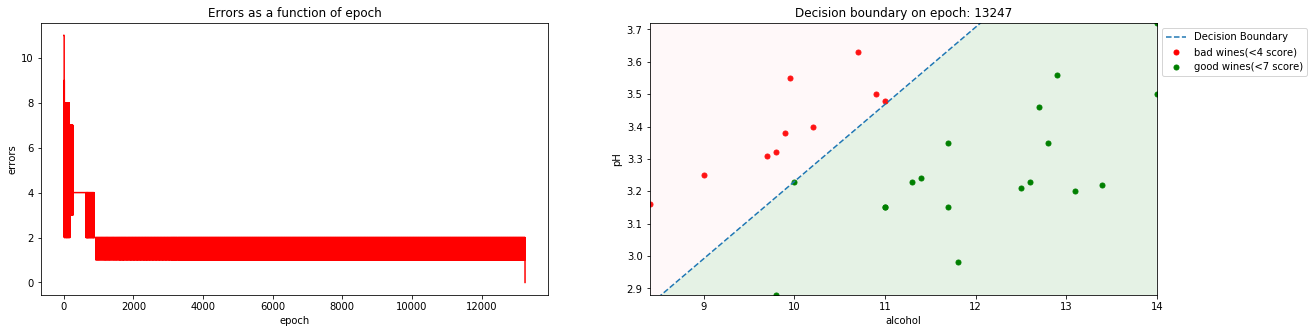

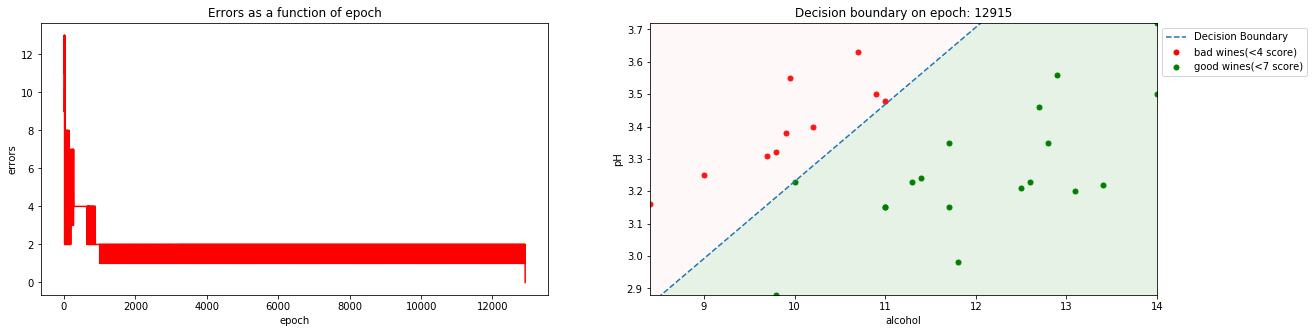

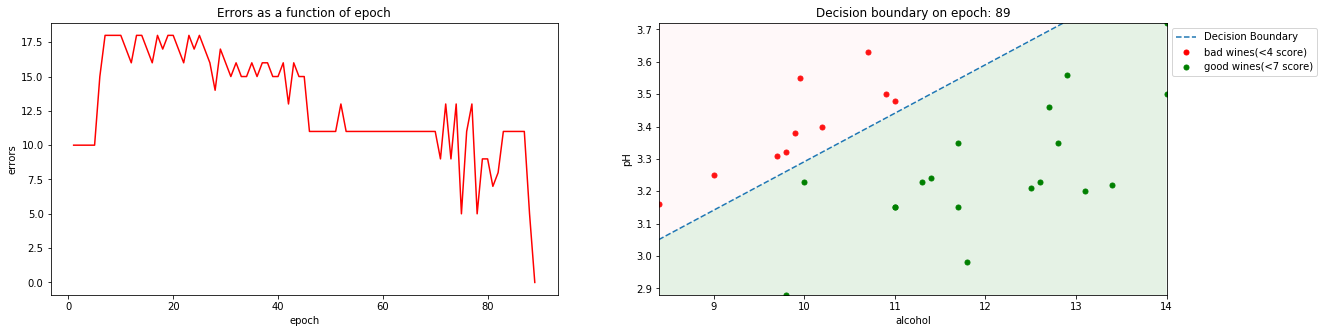

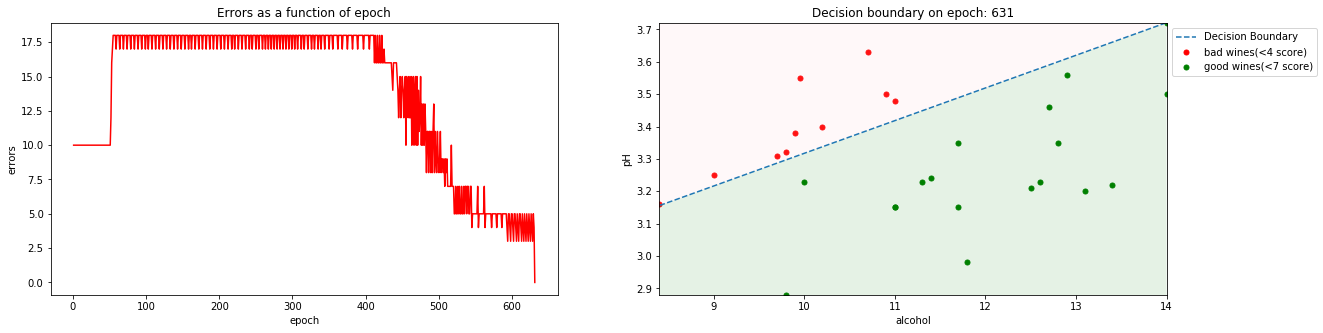

In [5]:
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    y = ['1' if k >= good_thresh else '-1' for k in df_data['quality']]
    X = df_data[['alcohol', 'pH']].values
    data = p.fit(X, y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x1_ = []
    y1_ = []
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    for i in data:
        x1 = i[0]
        y1 = i[1]
        x1_.append(x1)
        y1_.append(y1)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal) + 1)
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
                    y2_.append(y2)
    else:
        epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
            y2_.append(y2)
    
    plt.subplot(121)
    plt.plot(x1_, y1_, color='red')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Errors as a function of epoch")
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(<{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance.png')

p = perceptron(eta=0.1, n_iter=0)
plot_performance(p, 'winequality-red.csv', 8, 3,)
p = perceptron(eta=0.01, n_iter=0)
plot_performance(p, 'winequality-red.csv', 8, 3,)
p = perceptron(eta=0.001, n_iter=0)
plot_performance(p, 'winequality-red.csv', 8, 3,)
p = perceptron(eta=0.0001, n_iter=0)
plot_performance(p, 'winequality-red.csv', 8, 3,)

### d) modify the red wine data to help the perceptron learn more quickly

In [6]:
def average(values):
    if len(values) == 0:
        return None
    return sum(values, 0.0) / len(values)

def std(values):
    if len(values) < 2:
        return None
    sd = 0.0
    summ = 0.0
    meanvalue = average(values)
    for i in range(0, len(values)):
        diff = values.values[i] - meanvalue
        summ += diff * diff
    sd = summ / (len(values))
    return sd ** (1/2)
                
def standardization(data):
    x0 = data[data.columns[0]]
    x0mean = average(x0)
    x0std = std(x0)
    for i in data[data.columns[0]]:
        i = (x0 - x0mean) / x0std
        
    x1 = data[data.columns[1]]
    x1mean = average(x1)
    x1std = std(x1)
    for j in data[data.columns[1]]:
        j = (x1 - x1mean) / x1std

    #for k in data:
    stdata = data.loc[:, (data.columns[0], data.columns[1], data.columns[2])].copy()
    stdata.loc[:, (data.columns[0])] = i
    stdata.loc[:, (data.columns[1])] = j
    return stdata

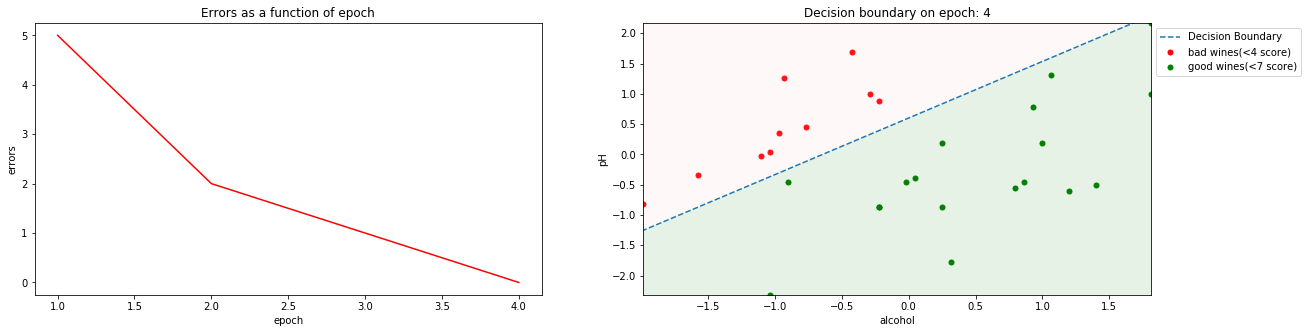

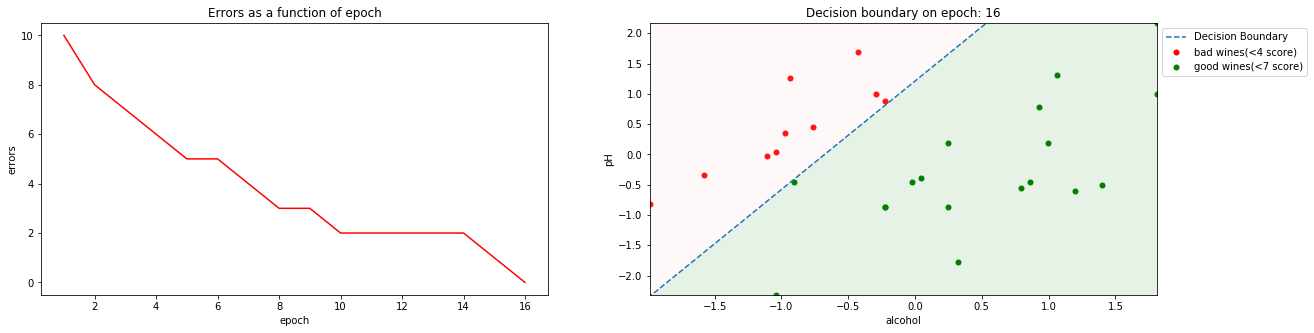

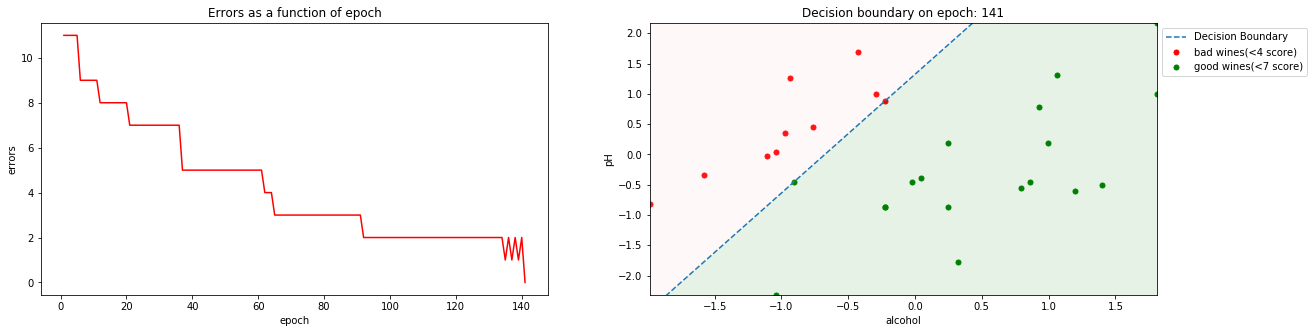

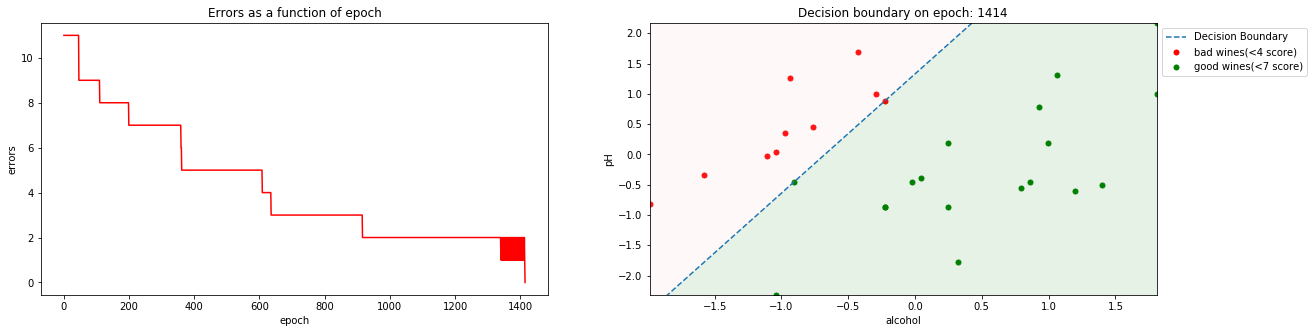

In [7]:
def plot_performance_per_std(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    rescaled = standardization(df_data)
    good1, good2, bad1, bad2 = winequality(rescaled, good_thresh, bad_thresh)
    y = ['1' if k >= good_thresh else '-1' for k in df_data['quality']]
    X = rescaled[['alcohol', 'pH']].values
    data = p.fit(X, y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x1_ = []
    y1_ = []
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    for i in data:
        x1 = i[0]
        y1 = i[1]
        x1_.append(x1)
        y1_.append(y1)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal) + 1)
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
                    y2_.append(y2)
    else:
        epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal) + 1)
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
            y2_.append(y2)
    plt.subplot(121)
    plt.plot(x1_, y1_, color='red')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Errors as a function of epoch")
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(<{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance_per_std.png')
        
p = perceptron(eta=0.1, n_iter=0)
plot_performance_per_std(p, 'winequality-red.csv', 8, 3,)
p = perceptron(eta=0.01, n_iter=0)
plot_performance_per_std(p, 'winequality-red.csv', 8, 3,)
p = perceptron(eta=0.001, n_iter=0)
plot_performance_per_std(p, 'winequality-red.csv', 8, 3,)
p = perceptron(eta=0.0001, n_iter=0)
plot_performance_per_std(p, 'winequality-red.csv', 8, 3,)

# V.3 My fair ADALINE
### a) Marvin notices and chides you for torturing your perceptron. Why?
#### The perceptron will never stop if the good wines and bad wines are not able to clearly divided into two regions. It will run until it finds no errors even if it is impossible to get 0 of errors.

### b) & c) implement an ADALINE

In [8]:
class adaline():
    def __init__(self, thresholds=0.0, eta=0.01, n_iter=0, batch=True):
        self.thresholds = thresholds
        self.eta = eta
        self.n_iter = n_iter
        self.batch = batch
    def fit(self, X, y):
        self.w_ = []
        result_ = []
        self.error_ = []
        num_epoch = 0
        cost = 0
        tmp = 0
        for i in range(1 + X.shape[1]):
            random.seed(0)
            self.w_.append(random.random())
        self.errors_ = []
        if (self.n_iter != 0): 
            for _ in range(self.n_iter):
                num_epoch += 1
                for xi, target in zip(X, y):
                    output = self.net_input2(xi)
                    error = (float(target) - float(output))
                    self.w_[0] += self.eta * error
                    dotprod = self.productmatrix2(xi, error)
                    self.w_[1:] = self.wupdate(dotprod)
                cost = self.calccost(self.net_input(X), y)
                print(cost)
                result = (num_epoch, cost, self.w_[1:], self.w_[0])
                self.error_.append(cost)
                result_.append(result)
                
        else:
            while (1):
                errors = 0
                result = 0
                num_epoch += 1
                for xi, target in zip(X, y):
                    output = self.net_input2(xi)
                    error = (float(target) - float(output))
                    self.w_[0] += self.eta * error
                    dotprod = self.productmatrix2(xi, error)
                    self.w_[1:] = self.wupdate(dotprod)
                cost = self.calccost(self.net_input(X), y)
                if round(tmp, 3) == round(cost, 3):
                    break
                else:
                    tmp = cost
                result = (num_epoch, cost, self.w_[1:], self.w_[0])
                self.error_.append(cost)
                result_.append(result)
                
        return result_

    def tpmatrix(self, X):
        j = 0
        
        result = [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]
        #t = [[0] * (len(X))] * len(X[0])
        #for i in range(len(X)):
        #    for j in range(len(X[0])):
        return result

    def net_input(self, X):
        dot = self.productmatrix(X, self.w_[1:])
        r_ = []
        for i in range(len(dot)):
            r = dot[i] + self.w_[0]
            r_.append(r)
        return r_
    
    def net_input2(self, X):
        activation = self.w_[0]
        for i in range(len(X)):
            activation += self.w_[i + 1] * X[i]
        return activation
    
    def productmatrix(self, X, w):
        dot = 0
        result = 0
        an = []

        for i in range(len(X)):
            result = 0
            for j in range(len(w)):
                dot = X[i][j] * w[j]
                result += dot
            an.append(result)
        return an

    def productmatrix2(self, X, w):
        dot = 0
        result = 0
        an = []

        for i in range(len(X)):
            result = 0
            dot = X[i] * w
            result += int(dot)
            an.append(result)
        return an
    
    def wupdate(self, dotprod):
        for i in range(len(self.w_[1:])):
            self.w_[i + 1] += self.eta * dotprod[i]
        return (self.w_[1:])
    
    def calcerror(self, output):
        e_ = []
        for i in range(len(output)):
            error = y[i] - output[i]
            e_.append(error)
        return e_
    
    def calccost(self, X, y):
        cost = 0
        for i in range(len(y)):
            cost += (y[i] - X[i])**2
        return cost / 2
    
    def predict(self, X):
        if self.net_input2(X) == 0.0:
            return 1
        else:
            return -1
        
    def accuracy(self, X, y):
        correct = 0
        for xi, yi in zip(X, y):
            correct += int(self.predict(xi) == int(yi))
            accuracy = correct / len(y)
            print('Accuracy: {0:.3f}'.format(accuracy))
        return accuracy

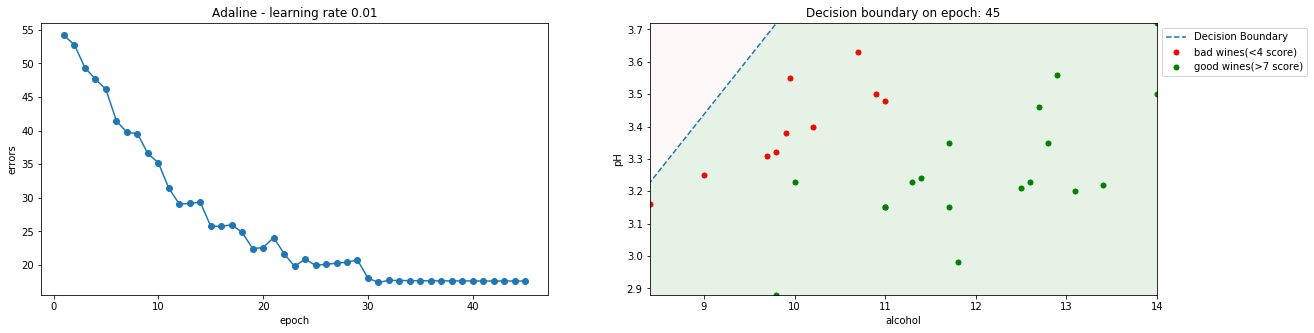

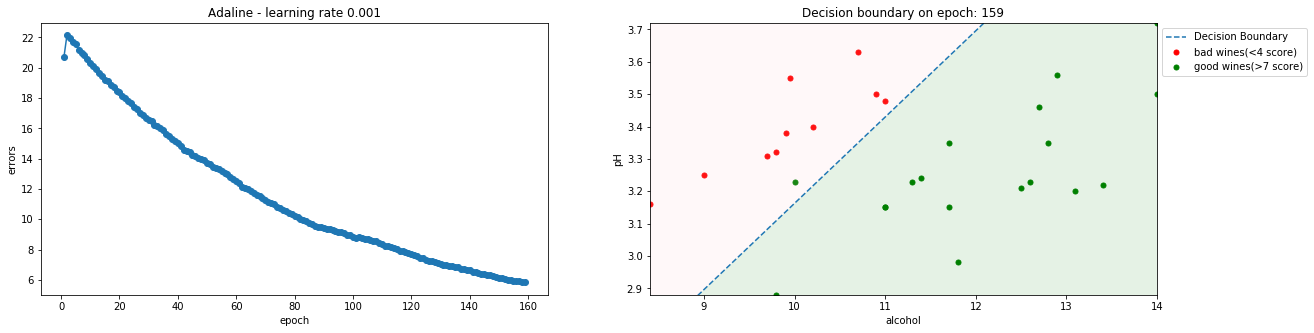

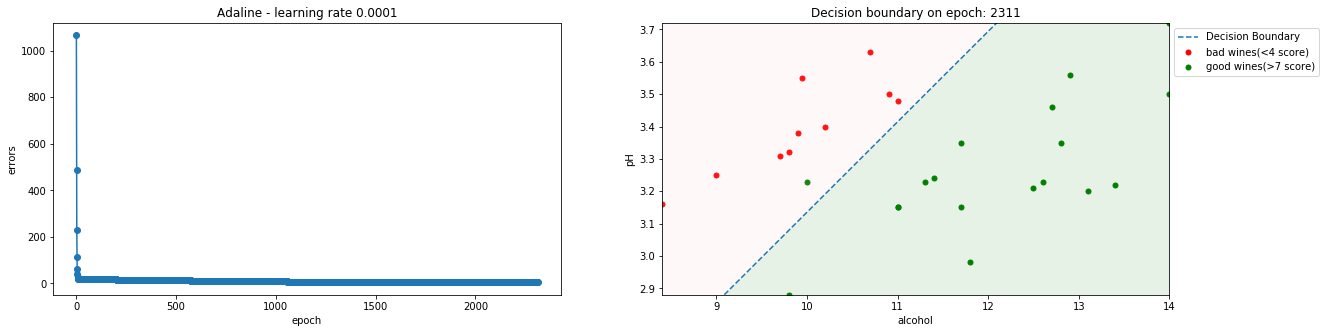

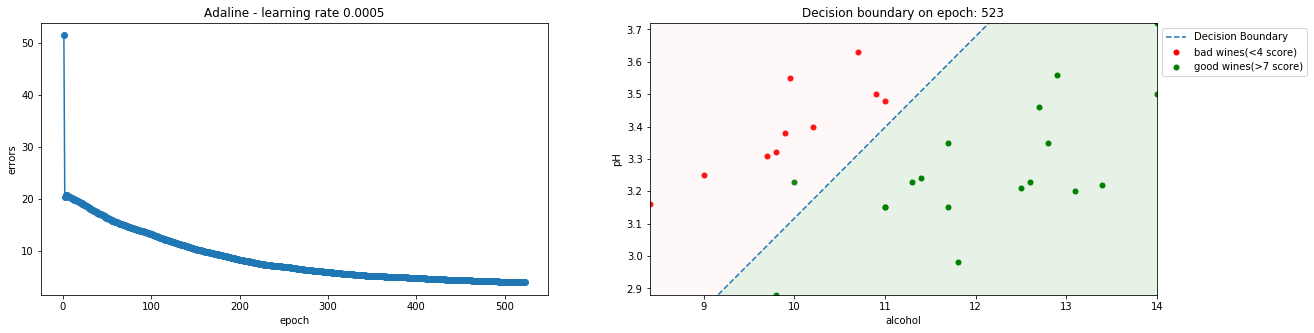

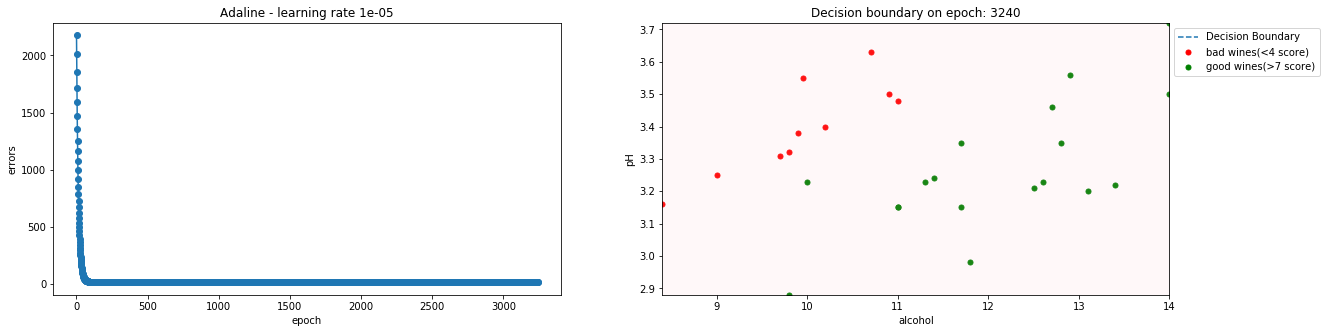

In [9]:
def plot_performance_ada(performance, df, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    #df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    y = [1 if k >= good_thresh else -1 for k in df_data['quality']]
    X = df_data[['alcohol', 'pH']].values
    data = ada.fit(X, y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal))
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i - (i[3] / i[2][1])
                    y2_.append(y2)
    else:
        for i in data:
            epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i - (i[3] / i[2][1])
            #y2 = (-(data[epoch - 1][3] / data[epoch - 1][2][1]) / (data[epoch - 1][3] / data[epoch - 1][2][0])) * x2i - (data[epoch - 1][3] / data[epoch - 1][2][1])
            y2_.append(y2)

    plt.subplot(121)
    plt.plot(range(1, len(ada.error_) + 1), ada.error_, marker='o')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Adaline - learning rate {}".format(ada.eta))
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(>{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance_ada.png')

        
ada = adaline(eta=0.01)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada(ada, df, 8, 3,)
ada = adaline(eta=0.001)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada(ada, df, 8, 3,)
#ada = adaline(eta=0.005)
#df = pd.read_csv('winequality-red.csv', sep=';')
#plot_performance_ada(ada, df, 8, 3,)
ada = adaline(eta=0.0001)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada(ada, df, 8, 3,)
ada = adaline(eta=0.0005)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada(ada, df, 8, 3,)
ada = adaline(eta=0.00001)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada(ada, df, 8, 3,)

# V.4 Advanced wine sampling and resampling
### a) function that used the holdout method to partition the red wine data into a training and a validation set

In [10]:
def holdout_split(data, split=0.80):
    train = data.sample(frac=split)
    test = data.drop(train.index)
    print('Train Set size : {}'.format(len(train)))
    print('Test Set size : {}'.format(len(test)))
    return train, test

Train Set size : 22
Test Set size : 6


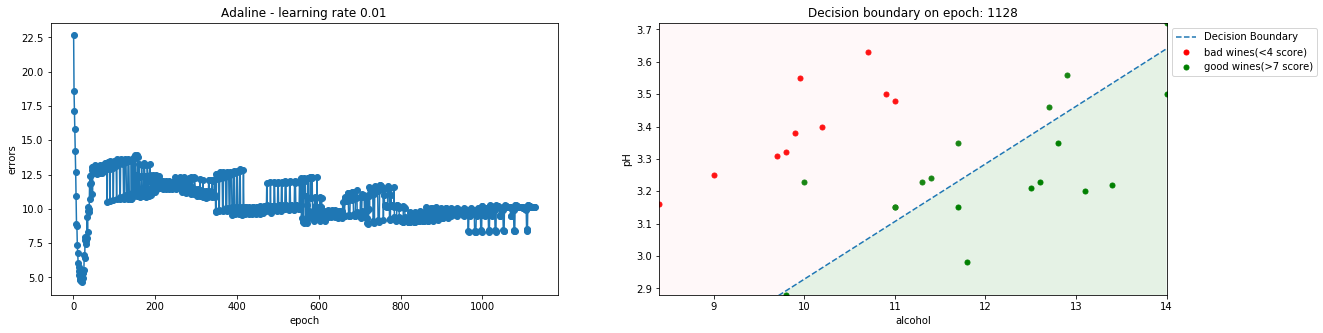

Train Set size : 22
Test Set size : 6


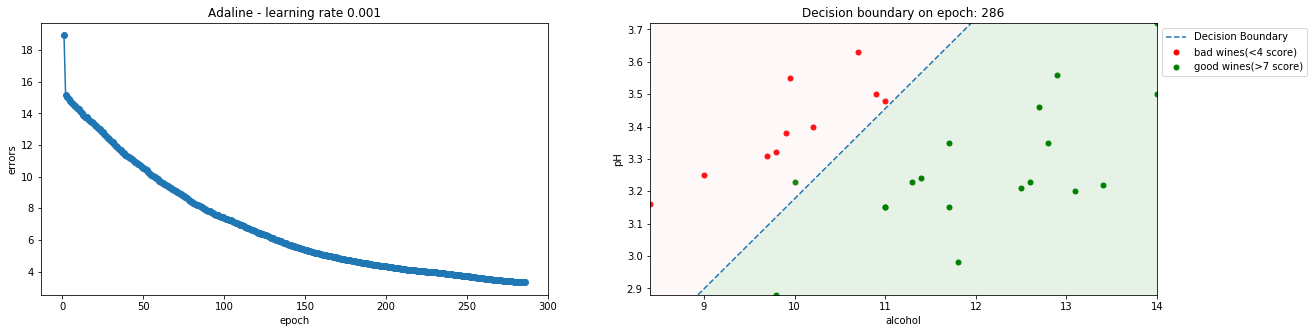

Train Set size : 22
Test Set size : 6


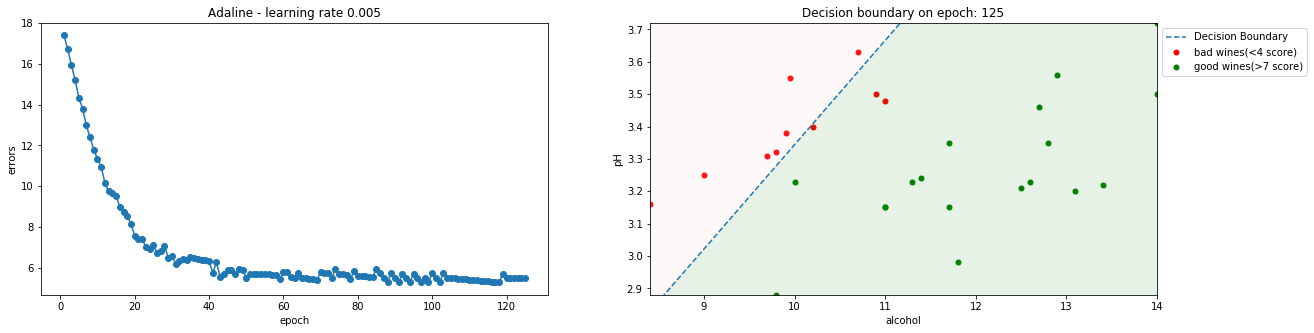

Train Set size : 22
Test Set size : 6


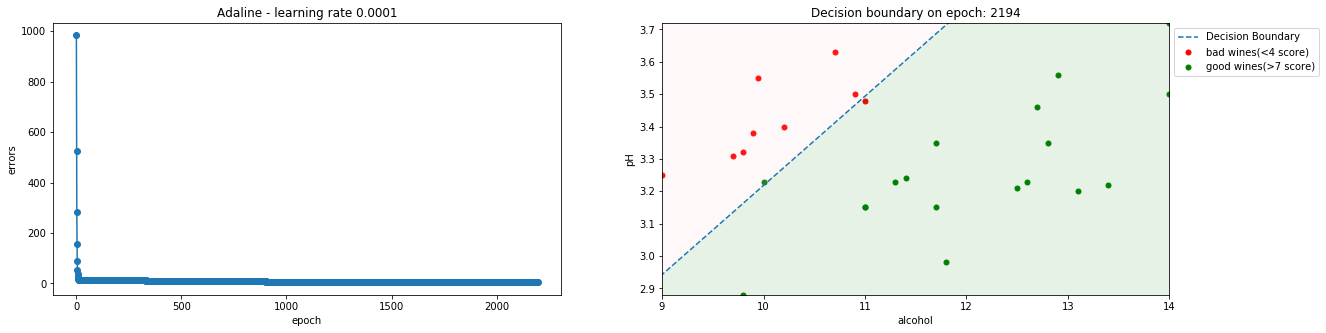

Train Set size : 22
Test Set size : 6


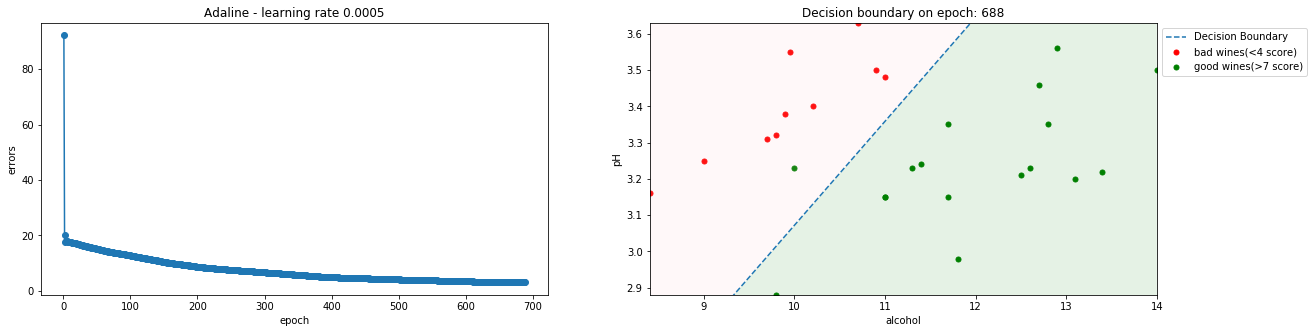

In [11]:
def plot_performance_ada_holdout(performance, df, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    #df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    train,test = holdout_split(df_data)
    X = train.loc[:,['alcohol', 'pH']].values
    y = [1 if k >= good_thresh else -1 for k in train['quality']]
    test_X = test.loc[:,['alcohol', 'pH']].values
    test_y = [1 if k >= good_thresh else -1 for k in test['quality']]
    data = ada.fit(X, y)
    #ada.accuracy(test_X, test_y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal))
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i - (i[3] / i[2][1])
                    y2_.append(y2)
    else:
        for i in data:
            epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i - (i[3] / i[2][1])
            #y2 = (-(data[epoch - 1][3] / data[epoch - 1][2][1]) / (data[epoch - 1][3] / data[epoch - 1][2][0])) * x2i - (data[epoch - 1][3] / data[epoch - 1][2][1])
            y2_.append(y2)

    plt.subplot(121)
    plt.plot(range(1, len(ada.error_) + 1), ada.error_, marker='o')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Adaline - learning rate {}".format(ada.eta))
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(>{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance_ada.png')

        
ada = adaline(eta=0.01)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada_holdout(ada, df, 8, 3,)
ada = adaline(eta=0.001)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada_holdout(ada, df, 8, 3,)
ada = adaline(eta=0.005)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada_holdout(ada, df, 8, 3,)
ada = adaline(eta=0.0001)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada_holdout(ada, df, 8, 3,)
ada = adaline(eta=0.0005)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada_holdout(ada, df, 8, 3,)
#ada = adaline(eta=0.00001)
#df = pd.read_csv('winequality-red.csv', sep=';')
#plot_performance_ada_holdout(ada, df, 8, 3,)

### b) function that generates a k-fold cross-validation dataset from the red wine data

In [12]:
def  cross_validation_split (data, folds=3):
    fold_size = int(data.shape[0] / folds)
    data_split = []
    
    for i in range(folds):
        fold_data = data.iloc[i * fold_size: (i + 1) * fold_size, :]
        data_split.append(holdout_split(fold_data))
    
    return data_split

In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df_filtered = df[(df.quality >= 6) | (df.quality <= 5)]
df_data = df_filtered[['alcohol', 'pH', 'quality']]
split = cross_validation_split(df_data)

Train Set size : 426
Test Set size : 107
Train Set size : 426
Test Set size : 107
Train Set size : 426
Test Set size : 107


### c) What effect does changing learning rate and number of training epochs have on the adaline when evaluated via k-fold cross-validation?

In [14]:
def cross_validate_adaline(folds, lr=0.00001, good_thresh = 6, bad_thresh = 5):
    sum_accuracy = 0

    for i, fold in enumerate(folds):
        X_train = fold[0].loc[:, ['alcohol', 'pH']]
        y_train = [1 if k >= good_thresh else -1 for k in fold[0]['quality']]
        
        ada = adaline(eta=lr)
        train_stats = ada.fit(X_train.values, y_train)
        
        X_val = fold[1].loc[:, ['alcohol', 'pH']]
        y_val = [1 if k >= good_thresh else -1 for k in fold[1]['quality']]
        accuracy = ada.accuracy(X_val.values, y_val)
        sum_accuracy += accuracy
    
    print('=================================')
    print('Mean model accuracy: {0:.3f}'.format(sum_accuracy / len(folds)))
    print('=================================')
cross_validate_adaline(split)

Accuracy: 0.009
Accuracy: 0.019
Accuracy: 0.028
Accuracy: 0.028
Accuracy: 0.037
Accuracy: 0.047
Accuracy: 0.047
Accuracy: 0.056
Accuracy: 0.056
Accuracy: 0.065
Accuracy: 0.075
Accuracy: 0.075
Accuracy: 0.084
Accuracy: 0.093
Accuracy: 0.103
Accuracy: 0.112
Accuracy: 0.121
Accuracy: 0.131
Accuracy: 0.131
Accuracy: 0.140
Accuracy: 0.150
Accuracy: 0.150
Accuracy: 0.159
Accuracy: 0.168
Accuracy: 0.168
Accuracy: 0.168
Accuracy: 0.178
Accuracy: 0.187
Accuracy: 0.196
Accuracy: 0.196
Accuracy: 0.206
Accuracy: 0.206
Accuracy: 0.206
Accuracy: 0.215
Accuracy: 0.215
Accuracy: 0.224
Accuracy: 0.224
Accuracy: 0.234
Accuracy: 0.243
Accuracy: 0.252
Accuracy: 0.252
Accuracy: 0.262
Accuracy: 0.271
Accuracy: 0.280
Accuracy: 0.290
Accuracy: 0.299
Accuracy: 0.299
Accuracy: 0.308
Accuracy: 0.308
Accuracy: 0.308
Accuracy: 0.318
Accuracy: 0.318
Accuracy: 0.318
Accuracy: 0.318
Accuracy: 0.327
Accuracy: 0.336
Accuracy: 0.336
Accuracy: 0.346
Accuracy: 0.355
Accuracy: 0.355
Accuracy: 0.355
Accuracy: 0.364
Accuracy

# V.5 Adventures in the Nth dimension
### a) under what circumstances can your perceptron/ADALINE successfully train?

## ex) Nth perceptron

In [15]:
p = perceptron(eta=0.01, n_iter=0)
df = pd.read_csv('winequality-red.csv', sep=';')
df_filtered = df[(df.quality >= 8) | (df.quality <= 3)]
df_data = df_filtered[['alcohol', 'pH', 'density', 'quality']]
rescaled = standardization(df_data)
y = ['1' if k >= 8 else '-1' for k in df_data['quality']]
X = rescaled[['alcohol', 'pH', 'density']].values
data = p.fit(X, y)
print(data)

[(1, 10, [0.9704275252222051, 0.6917842799951357, 0.6848910515250481], 0.684421851525048), (2, 9, [1.0648349275560283, 0.5323161771392597, 0.5453762515250482], 0.5444218515250479), (3, 8, [1.0983460444654949, 0.3641095733132963, 0.46561665152504833], 0.4644218515250478), (4, 7, [1.11246236033126, 0.20296245717059128, 0.4058234515250483], 0.4044218515250477), (5, 5, [1.0925348681228124, 0.07623511340788153, 0.38591185152504826], 0.3844218515250477), (6, 5, [1.0726073759143648, -0.05049223035482822, 0.3660002515250482], 0.3644218515250477), (7, 5, [1.0526798837059173, -0.177219574117538, 0.3460886515250482], 0.3444218515250477), (8, 3, [1.0449558618171022, -0.22381219282704376, 0.3261350515250482], 0.32442185152504766), (9, 3, [1.0372318399282872, -0.2704048115365495, 0.30618145152504816], 0.30442185152504764), (10, 2, [1.0236724284620289, -0.2971163865542842, 0.30612305152504815], 0.30442185152504764), (11, 2, [1.0101130169957706, -0.3238279615720189, 0.30606465152504814], 0.30442185152

## ex) Nth ADALINE

In [16]:
ada = adaline(eta=0.01)
df = pd.read_csv('winequality-red.csv', sep=';')
df_filtered = df[(df.quality >= 7) | (df.quality <= 5)]
df_data = df_filtered[['alcohol', 'pH', 'density', 'quality']]
y = [1 if k >= 8 else -1 for k in df_data['quality']]
X = df_data[['alcohol', 'pH', 'density']].values
data = ada.fit(X, y)
print(data)

[(1, 57.21688621426789, [-0.14557814847495223, -0.17557814847495198, 0.594421851525048], 0.5082998862648311), (2, 42.66721888757263, [-0.055578148474952266, -0.3755781484749521, 0.4644218515250479], 0.363440031872089), (3, 38.77929552225088, [0.014421851525047713, -0.5155781484749522, 0.3644218515250478], 0.297585948097792), (4, 40.12155402149741, [0.0744218515250476, -0.6455781484749519, 0.24442185152504772], 0.25713096727164914), (5, 42.97601203176042, [0.10442185152504752, -0.6855781484749508, 0.09442185152504787], 0.2513461264590405), (6, 42.03633863101771, [0.10442185152504735, -0.6555781484749501, -0.03557814847495218], 0.2760709325980556), (7, 42.0184400503704, [0.11442185152504747, -0.6555781484749494, -0.17557814847495207], 0.3095495001196981), (8, 40.77987396677706, [0.1144218515250473, -0.6255781484749487, -0.315578148474952], 0.3402441411333585), (9, 45.061410650942555, [0.12442185152504731, -0.6255781484749481, -0.4255781484749521], 0.38208167196972015), (10, 44.8324979097

### b) decision boundary for 3 factors, 7 factors, and 11 factors?

Decision boundary for N factors is (N - 1) dimentional hyperplane, so for 3 factors it is going to be 2 dimentional plane, 7 factors for 6 dimentional plane, and 11 factors for 10 dimentional plane.

# V.6 Marvin's rebuttal
### a) Pan-Galactic Gargle Blaster dataset

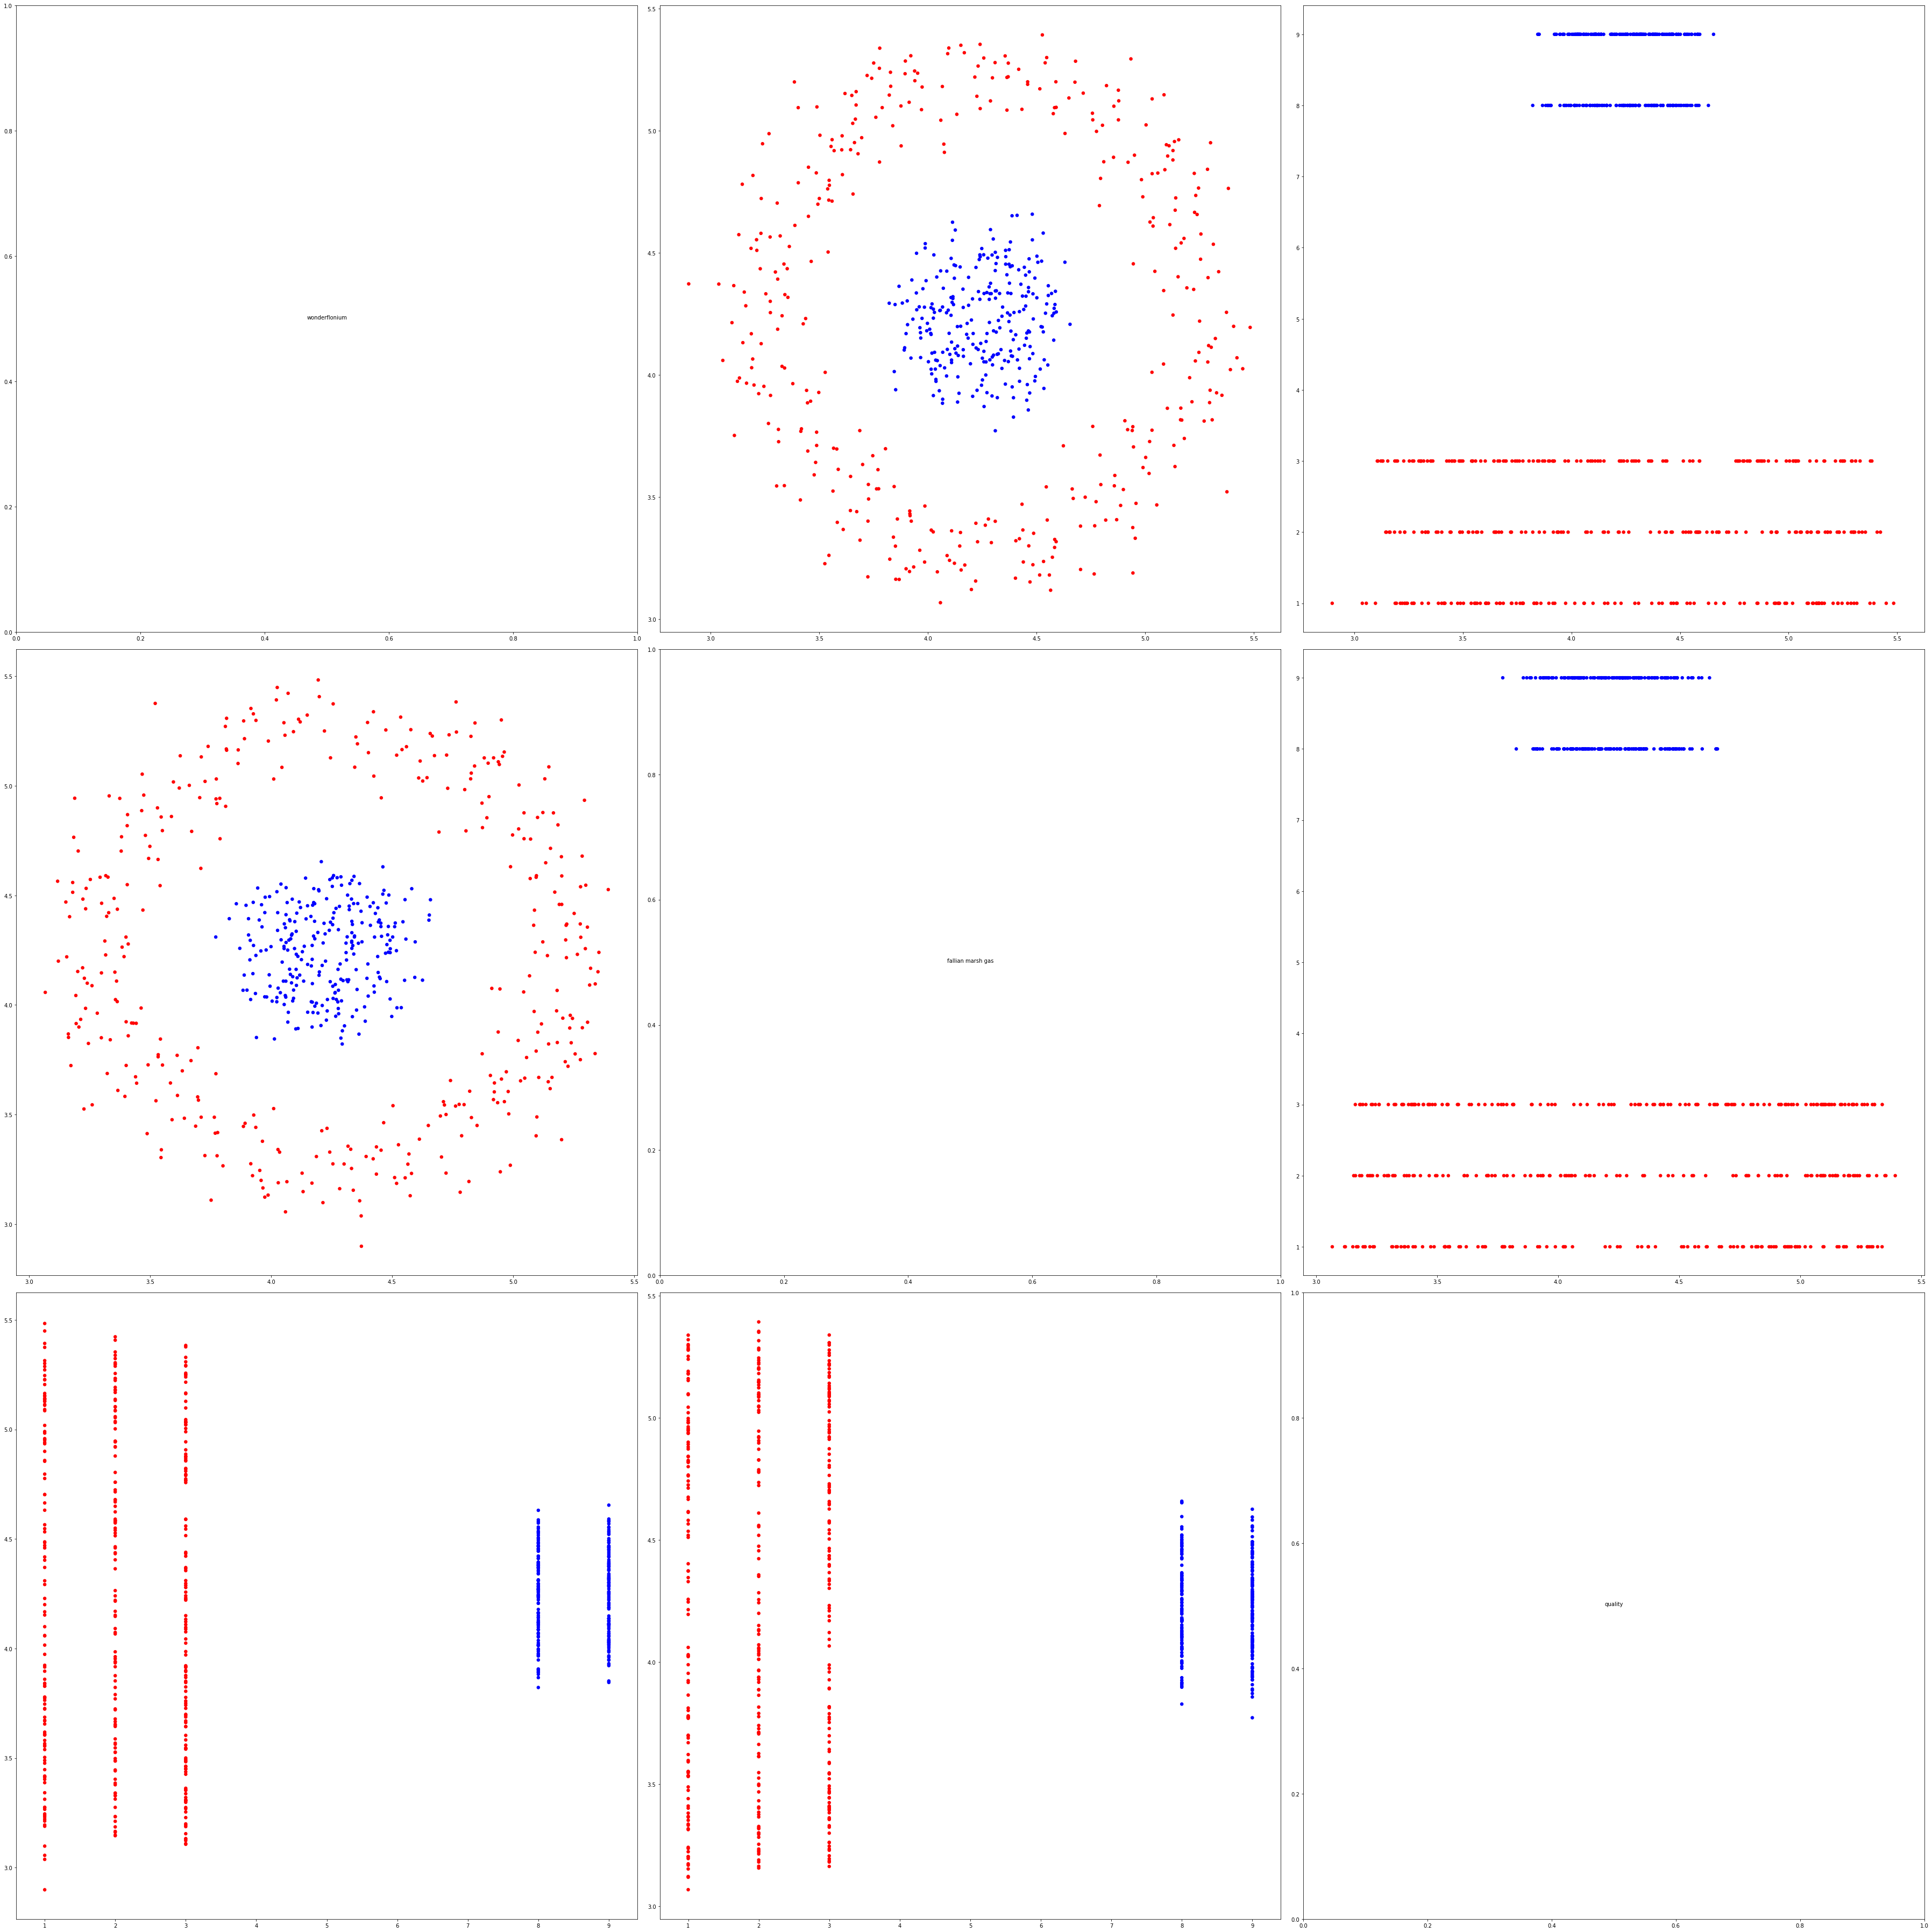

In [17]:
plot_scatter_matrix('Pan Galactic Gargle Blaster.csv', 8, 3, save_plot=False)

In [90]:
def rescale_maxmin(X):
    xmaxVal = 0
    xminVal = 0
    ymaxVal = 0
    yminVal = 0
    for i in X:
        xmaxVal = max(xmaxVal, )
        xminVal = min(xminVal, i[0])
        ymaxVal = max(ymaxVal, i[1])
        yminVal = min(yminVal, i[1])
    return xmaxVal + 1, xminVal - 1, ymaxVal + 1, yminVal - 1

def rescale_data(data):
    xmaxVal, xminVal, ymaxVal, yminVal = rescale_maxmin(data)
    print(xmaxVal)
    print(xminVal)
    mid_x = (int)(xmaxVal - xminVal) / 2
    mid_y = (int)(ymaxVal - yminVal) / 2
    print(mid_x)
    print(mid_y)
    for i, j in data[data[0]], data[data[1]]:
        if i < mid_x:
            if j[1] < mid_y:
                j = (ymaxVal - yminVal) - mid_y
            i = (xmaxVal - xminVal) - mid_x
        if i >= mid_x:
            if j < mid_y:
                j = (ymaxVal - yminVal) - mid_y
    print(data)
    return data

In [91]:
def plot_performance_ada(performance, df, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['wonderflonium', 'fallian marsh gas', 'quality']]
    print(df_data)
    rescaled = rescale_data(df_data)
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    y = [1 if k >= good_thresh else -1 for k in df_data['quality']]
    X = df_data[['wonderflonium', 'fallian marsh gas']].values
    data = ada.fit(X, y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x2_ = []
    y2_ = [] 
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    if epoch > 0:
        for i in rescale_data:
            x2_ = range(int(xmaxVal - xminVal), int(xmaxVal))
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i - (i[3] / i[2][1])
                    y2_.append(y2)
    else:
        for i in rescale_data:
            epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xmaxVal - xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i - (i[3] / i[2][1])
            #y2 = (-(data[epoch - 1][3] / data[epoch - 1][2][1]) / (data[epoch - 1][3] / data[epoch - 1][2][0])) * x2i - (data[epoch - 1][3] / data[epoch - 1][2][1])
            y2_.append(y2)

    plt.subplot(121)
    plt.plot(range(1, len(ada.error_) + 1), ada.error_, marker='o')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Adaline - learning rate {}".format(ada.eta))
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(>{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance_ada.png')

        
ada = adaline(eta=0.0001)
df = pd.read_csv('Pan Galactic Gargle Blaster.csv', sep=';')
plot_performance_ada(ada, df, 8, 3,)

     wonderflonium  fallian marsh gas  quality
0         4.151636           5.350607        2
1         3.403125           4.787343        2
2         5.036224           4.609847        2
3         4.483534           4.332340        9
4         4.215979           5.220295        2
5         4.358374           4.484558        9
6         3.672214           3.440111        1
7         4.940593           3.772474        1
8         4.572444           4.242681        8
9         5.084678           4.044793        2
10        3.502908           4.981997        1
11        3.319864           4.569648        3
12        3.538569           4.762201        1
13        4.437047           3.364933        2
14        3.822084           5.146626        2
15        3.916384           3.442827        3
17        3.726767           3.491948        3
18        3.188548           4.029706        1
20        4.278320           3.409784        3
21        3.746066           3.669214        1
22        3.3

TypeError: string indices must be integers

In [39]:
def average(values):
    if len(values) == 0:
        return None
    return sum(values, 0.0) / len(values)

def std(values):
    if len(values) < 2:
        return None
    sd = 0.0
    summ = 0.0
    meanvalue = average(values)
    for i in range(0, len(values)):
        diff = values.values[i] - meanvalue
        summ += diff * diff
    sd = summ / (len(values))
    return sd ** (1/2)
                
def standardization(data):
    x0 = data[data.columns[0]]
    x0mean = average(x0)
    x0std = std(x0)
    for i in data[data.columns[0]]:
        i = (x0 - x0mean) / x0std
        
    x1 = data[data.columns[1]]
    x1mean = average(x1)
    x1std = std(x1)
    for j in data[data.columns[1]]:
        j = (x1 - x1mean) / x1std

    #for k in data:
    stdata = data.loc[:, (data.columns[0], data.columns[1], data.columns[2])].copy()
    stdata.loc[:, (data.columns[0])] = i
    stdata.loc[:, (data.columns[1])] = j
    return stdata

In [40]:
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['wonderflonium', 'fallian marsh gas', 'quality']]
    #rescaled = standardization(df_data)
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    y = ['1' if k >= good_thresh else '-1' for k in df_data['quality']]
    X = df_data[['wonderflonium', 'fallian marsh gas']].values
    data = p.fit(X, y)
    print(data)

p = perceptron_pan(eta=0.0001, n_iter=0)
plot_performance(p, 'Pan Galactic Gargle Blaster.csv', 7, 3,)
#p = perceptron_pan(eta=0.01, n_iter=0)
#plot_performance(p, 'Pan Galactic Gargle Blaster.csv', 8, 3,)
#p = perceptron_pan(eta=0.001, n_iter=0)
#plot_performance(p, 'Pan Galactic Gargle Blaster.csv', 8, 3,)
#p = perceptron_pan(eta=0.0001, n_iter=0)
#plot_performance(p, 'Pan Galactic Gargle Blaster.csv', 8, 3,)

KeyboardInterrupt: 

In [ ]:
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x1_ = []
    y1_ = []
    x2_ = []
    y2_ = []
    #rescaled = rescale_data(X)
    for i in rescaled:
        x1 = i[0]
        y1 = i[1]
        x1_.append(x1)
        y1_.append(y1)
    if epoch > 0:
        for i in rescaled:
            x2_ = range(int(xminVal), int(xmaxVal) + 1)
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
                    y2_.append(y2)
    else:
        epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
            y2_.append(y2)
    
    plt.subplot(121)
    plt.plot(x1_, y1_, color='red')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Errors as a function of epoch")
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(<{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance.png')



# BONUS PART

# VI.2 Do perceptrons dream of electric sheep?

In [ ]:
from matplotlib import animation

fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)

#anim.save('exAnimation.gif', writer='imagemagick', fps=30, dpi=100)

plt.show()

In [ ]:
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    y = ['1' if k >= good_thresh else '-1' for k in df_data['quality']]
    X = df_data[['alcohol', 'pH']].values
    data = p.fit(X, y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x1_ = []
    y1_ = []
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    for i in data:
        x1 = i[0]
        y1 = i[1]
        x1_.append(x1)
        y1_.append(y1)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal) + 1)
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
                    y2_.append(y2)
    else:
        epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
            y2_.append(y2)
    
    plt.subplot(121)
    plt.plot(x1_, y1_, color='red')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Errors as a function of epoch")
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(<{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    
    #animation ///blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
    anim.save('exAnimation.gif', writer='imagemagick', fps=30, dpi=100)

    plt.show()
    if save_plot==True:
        plt.savefig('./performance.png')


p = perceptron(eta=0.001, n_iter=0)
plot_performance(p, 'winequality-red.csv', 6, 5,)



# VI.3 Dimensional traveler

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_performance_ada(performance, df, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    #df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'density', 'quality']]
    good_wines = df_data[(df_data['quality'] >= good_thresh)]
    bad_wines = df_data[(df_data['quality'] <= bad_thresh)]
    y = [1 if k >= good_thresh else -1 for k in df_data['quality']]
    X = df_data[['alcohol', 'pH', 'density']].values
    data = ada.fit(X, y)
    fig = plt.figure(figsize=(15,10))
    numvar = X.shape[0]
    x2_ = []
    y2_ = []
    
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal))
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i - (i[3] / i[2][1])
                    y2_.append(y2)
    else:
        for i in data:
            epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i - (i[3] / i[2][1])
            #y2 = (-(data[epoch - 1][3] / data[epoch - 1][2][1]) / (data[epoch - 1][3] / data[epoch - 1][2][0])) * x2i - (data[epoch - 1][3] / data[epoch - 1][2][1])
            y2_.append(y2)

    #plt.subplot(121)
    #plt.plot(range(1, len(ada.error_) + 1), ada.error_, marker='o')
    #plt.xlabel('epoch')
    #plt.ylabel('errors')
    #plt.title("Adaline - learning rate {}".format(ada.eta))
    
    ##scatter plot
    ax = fig.gca(projection='3d')
    
    
    ax.scatter(good_wines.loc[:, df_data.columns[0]], good_wines.loc[:, df_data.columns[1]], good_wines.loc[:, df_data.columns[2]],
                    c= 'green', label='good wines (> {} score)'.format(good_thresh - 1))
    
    ax.scatter(bad_wines.loc[:, df_data.columns[0]], bad_wines.loc[:, df_data.columns[1]], bad_wines.loc[:, df_data.columns[2]],
                    c= 'red', label='bad wines (< {} score)'.format(bad_thresh - 1))
    
    ax.set_xlabel(df_data.columns[0])
    ax.set_ylabel(df_data.columns[1])
    ax.set_zlabel(df_data.columns[2])

    ##decision boundary    
    
#    x_min = wine_data.loc[:, df_data.columns[0]].min() - 0.05
#    x_max = wine_data.loc[:, df_data.columns[0]].max() + 0.05
#    y_min = wine_data.loc[:, df_data.columns[1]].min() - 0.05
#    y_max = wine_data.loc[:, df_data.columns[1]].max() + 0.05
    
    xx, yy = np.meshgrid(range(-1, 2), range(-1, 2))
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    ax.set_title('Decision boundary at epoch {}'.format(epoch))
    ax.set_xlim3d(xminVal, xmaxVal)
    ax.set_xlim3d(yminVal, ymaxVal)
    
    w3, w2, w1 = performance[epoch][2]
    b = performance[epoch][3]
    
    x_slope = -w1 / w3
    y_slope = -w2 / w3
    
    # slope = -w1/w2
    intercept = -b / w3
    z_coords = x_slope * xx + y_slope * yy + intercept
    
    ax.set_zlim3d(-1.01, 1.01)
    

    ax.plot_surface(xx, yy, z_coords, label='Decision boundary')
    
    
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance_ada.png')

        
ada = adaline(eta=0.001)
df = pd.read_csv('winequality-red.csv', sep=';')
plot_performance_ada(ada, df, 7, 4)